In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
np.random.seed(1671) #for reproducibility

In [12]:
# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASS = 10 #number of outputs = number of digits
OPTIMIZER = SGD() # SGD Optimizer
N_HIDDEN = 128
VALIDATION_SPLIT =0.2 # how much TRAIN is reserved for VALIDATION

In [4]:
# data shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
RESHAPED = 784

11493376/11490434 [==============================] - 3s 0us/step


In [6]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train sample')
print(X_test.shape[0], 'test samples')

60000 train sample
10000 test samples


In [8]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASS)
Y_test = np_utils.to_categorical(y_test, NB_CLASS)

In [9]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(NB_CLASS, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [14]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 3s 59us/step - loss: 1.3633 - acc: 0.6796 - val_loss: 0.8904 - val_acc: 0.8246
Epoch 2/200
48000/48000 [==============================] - 2s 33us/step - loss: 0.7913 - acc: 0.8272 - val_los

limit_output extension: Maximum message size of 10000 exceeded with 10028 characters

In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [16]:
import matplotlib.pyplot as plt

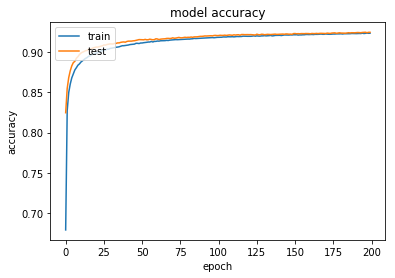

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.subplot(1, 2, 1)

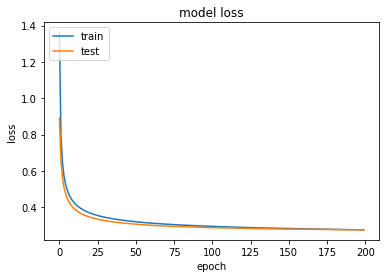

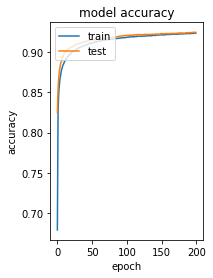

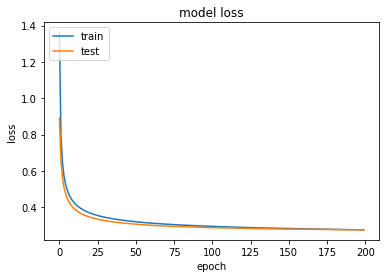

In [25]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.subplot(1, 2, 1)

In [26]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 0s 41us/step
Test score: 0.277385849687
Test accuracy 0.9227
